In [236]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn.datasets import load_digits
from sklearn.mixture.base import BaseMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from random import randint
from sklearn.cluster import DBSCAN

In [237]:
def My_DBSCAN(z, eps, min_pts):

    cluster_id = 0
    label = [0]*z.shape[0]
    
    for i in range(0, z.shape[0]):

        if label[i] != 0:#check if the point is already assigned to a cluster or if it cannot be a cluster since it has
            continue#lower then required number of neighbors i.e min_points 
        
        neighbour_pts = Get_Neighbours(z,i,eps)
        if len(neighbour_pts) < min_pts:#if not assigned to a cluster and lower then required min_points
            label[i] = -1 
            continue
        cluster_id += 1
        Grow_Cluster(neighbour_pts, label, i, cluster_id, eps, min_pts,z)#The point is centroid of cluster and we find the
        #points which belong to this cluster

    return  label

In [238]:
def Grow_Cluster(neighbour_pts, label, i, cluster_id, eps, min_pts,z):
    #this method is used to grow the cluster by taking each neighbor of a particular cluster id and checking if
    #it is not assigned to any cluster if it is not assigned to any cluster it is assigned to the present cluster
    #we also check all the neighbour of the point and add them to the neighbor of the original cluster so all the
    #neighbor of the neighbouring points of original cluseter also belong to same cluster.
    label[i] = cluster_id 
    for point in neighbour_pts:
        
        if label[point] == -1:
            label[point] = cluster_id #border points

        if label[point] == 0:
            label[point] = cluster_id
            new_neighbor = Get_Neighbours(z,point,eps)
            if len(new_neighbor) >= min_pts:
                neighbour_pts += new_neighbor

In [239]:
def Get_Neighbours(z,point,eps):
    #This method is used to get all the points which are at epsilon distance from the original point using euclidian
    #distance formula.
    neighbors = []
    
    for l in range(0, z.shape[0]):
        if np.linalg.norm(z[point] - z[l]) <= eps:
            neighbors.append(l)
    
    return neighbors        

In [240]:
def listToList(lst): #convert list of list to list
    return list(map(lambda el:[el], lst)) 

In [241]:
def Unique_Clusters(clusters):#get the unique clusters from list of clusters
    temp=set()
    unique_clusters=[]
    for i in range(len(clusters)):
        if(clusters[i] in temp):
            continue
        else:
            temp.add(clusters[i])
            unique_clusters.append(clusters[i])
    return unique_clusters

In [242]:
#pca plot for our implementation

def PCA_Plot(clusters1,input_file,unique_clusters,mystr):
    pca_data = PCA(n_components = 2).fit_transform(input_file)
    finalDf = np.concatenate((pca_data, clusters1), axis = 1)
    finalDf = pd.DataFrame({'Component1': finalDf[:, 0], 'Component2': finalDf[:, 1], 'Target': finalDf[:, 2]})
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(mystr, fontsize = 20)
    targets = unique_clusters
    colors=[]
    for i in range(len(unique_clusters)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'Component1']
                   , finalDf.loc[indicesToKeep, 'Component2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [243]:
##calculating jaccard and rand coefficients

def JaccardRand(cluster, assigned_cluster,mystr):
    ground_truth_matrix = np.zeros((len(assigned_cluster),len(assigned_cluster)))
    incidence_matrix = np.zeros((len(assigned_cluster),len(assigned_cluster)))

    for i in range(len(assigned_cluster)):
        for j in range(len(assigned_cluster)):
            ground_truth_matrix[i][j] = 1 if (assigned_cluster[i]==assigned_cluster[j]) else 0
            incidence_matrix[i][j] = 1 if (cluster[i]==cluster[j]) else 0
            
    m_1_1 = m_0_0 = m_1_0 = m_0_1 = 0.0
    for i in range(len(ground_truth_matrix)):
        for j in range(len(ground_truth_matrix)):
            if ground_truth_matrix[i][j] == incidence_matrix[i][j]:
                if ground_truth_matrix[i][j] == 1:
                    m_1_1 += 1
                else:
                    m_0_0 += 1
            else:
                if ground_truth_matrix[i][j] == 1:
                    m_1_0 += 1
                else:
                    m_0_1 += 1


    Jaccard = str(m_1_1 / (m_1_1 + m_1_0 + m_0_1))  
    Rand = str((m_1_1 + m_0_0) / (m_1_1 + m_0_0 + m_1_0 + m_0_1))
    print("The RAND coefficient for "+mystr+" is:"+str(Rand))
    print("The JACCARD coefficient for "+mystr+" is:"+str(Jaccard))

# INPUT FILE CHO.TXT

In [244]:
# # INPUT FILE CHO.TXT

cho=np.loadtxt("/home/tanmay/Documents/DM/Project2/cho.txt")#reading cho.txt
cho1=cho[:,2:]#selecting columns from 2nd to last of cho.txt
epsilon_cho = 1
minimumpoints_cho = 4

# LIBRARY IMPLEMENTATION On CHO.TXT

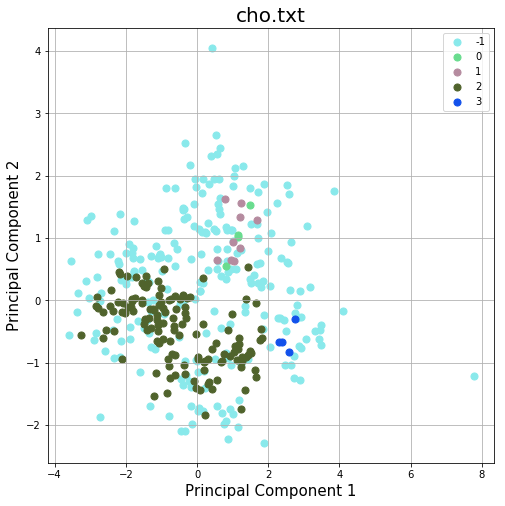

In [245]:
clusters_cho1 = DBSCAN(epsilon_cho, minimumpoints_cho).fit(cho1)#dbscan using library function
unique_clusters_cho1=Unique_Clusters(clusters_cho1.labels_)#unique custers from library implementation
unique_clusters_cho1
clusters_cho1.labels_=clusters_cho1.labels_.reshape((len(cho1),1))
PCA_Plot(clusters_cho1.labels_,cho1,unique_clusters_cho1,"cho.txt")#pca for library implementation

# Scratch Implementation on CHO.TXT

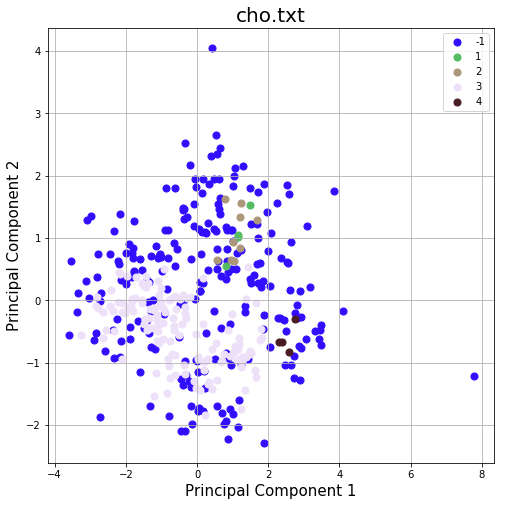

In [246]:
# # Scratch Implementation on CHO.TXT

clusters_cho = My_DBSCAN(cho1, epsilon_cho, minimumpoints_cho)#performing dbscan using our implementation
unique_clusters_cho=Unique_Clusters(clusters_cho)#getting unique clusters from our implementation
unique_clusters_cho
clusters_cho=listToList(clusters_cho)
PCA_Plot(clusters_cho,cho1,unique_clusters_cho,"cho.txt")#pca plot for our implementation

# jaccard and rand coefficients for cho.txt

In [255]:
JaccardRand(cho[:,1],clusters_cho,"cho.txt")#jaccard and rand coefficient for our implementation

The RAND coefficient for cho.txt is:0.523222099922
The JACCARD coefficient for cho.txt is:0.203663430711


In [256]:
JaccardRand(cho[:,1],clusters_cho1.labels_,"cho.txt")#jaccard and rand coefficient for library method

The RAND coefficient for cho.txt is:0.523222099922
The JACCARD coefficient for cho.txt is:0.203663430711


# INPUT FILE IYER.TXT

In [259]:
iyer=np.loadtxt("/home/tanmay/Documents/DM/Project2/iyer.txt")#reading iyer.txt
iyer1=iyer[:,2:]#selection columns from 2 to last in iyer.txt
epsilon_iyer = 1
minimumpoints_iyer = 4

# LIBRARY IMPLEMENTATION On IYER.TXT

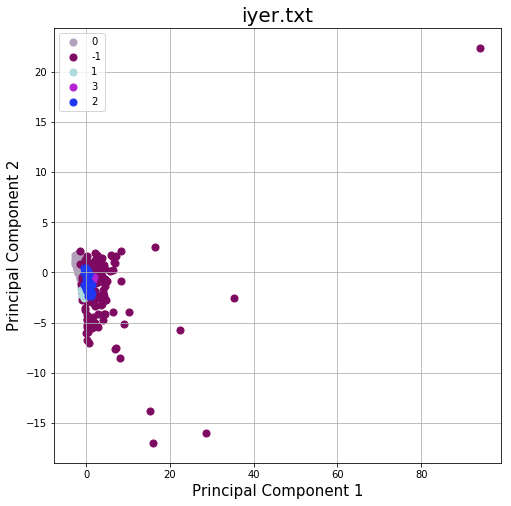

In [260]:
# # LIBRARY IMPLEMENTATION On IYER.TXT

clusters_iyer1 = DBSCAN(epsilon_iyer, minimumpoints_iyer).fit(iyer1)#dbscan using library implementation
unique_clusters_iyer1=Unique_Clusters(clusters_iyer1.labels_)#unique clusters using libraray implementation
unique_clusters_iyer1
clusters_iyer1.labels_=clusters_iyer1.labels_.reshape((len(iyer1),1))
PCA_Plot(clusters_iyer1.labels_,iyer1,unique_clusters_iyer1,"iyer.txt")#pca plot for library implementation

# Scratch Implementation On IYER.TXT

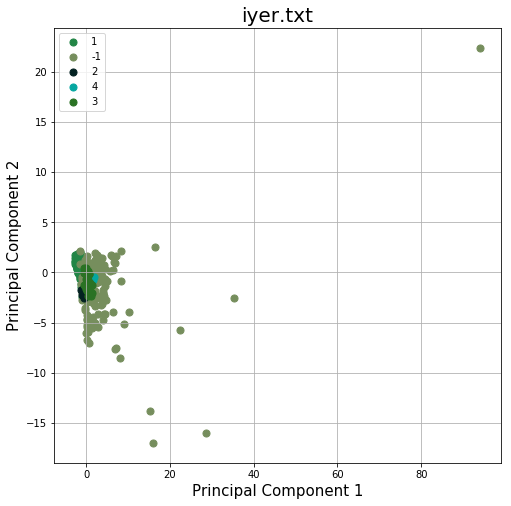

In [261]:
#DBSCAN
clusters_iyer = My_DBSCAN(iyer1, epsilon_iyer, minimumpoints_iyer)#dbscan using our implementation
unique_clusters_iyer=Unique_Clusters(clusters_iyer)#unique clusters using our implementation
unique_clusters_iyer
clusters_iyer=listToList(clusters_iyer)
PCA_Plot(clusters_iyer,iyer1,unique_clusters_iyer,"iyer.txt")#pca plot for our implementation

# jaccard and rand coefficients for iyer.txt

In [262]:
# # jaccard and rand coefficients for iyer.txt

JaccardRand(iyer[:,1],clusters_iyer,"iyer.txt")#jaccard and rand coefficient for our method
JaccardRand(iyer[:,1],clusters_iyer1.labels_,"iyer.txt")#jaccard and rand coefficient for library method
plt.show()

The RAND coefficient for iyer.txt is:0.650737591147
The JACCARD coefficient for iyer.txt is:0.283738059616
The RAND coefficient for iyer.txt is:0.650737591147
The JACCARD coefficient for iyer.txt is:0.283738059616


# Input File DBSCAN.TXT

In [263]:
dbscan=np.loadtxt("/home/tanmay/Documents/DM/Project2/DBSCAN.txt")#reading iyer.txt
dbscan1=dbscan[:,2:]#selection columns from 2 to last in iyer.txt
epsilon_dbscan = 0.25
minimumpoints_dbscan = 4

# Library Implementation of DBSCAN.TXT

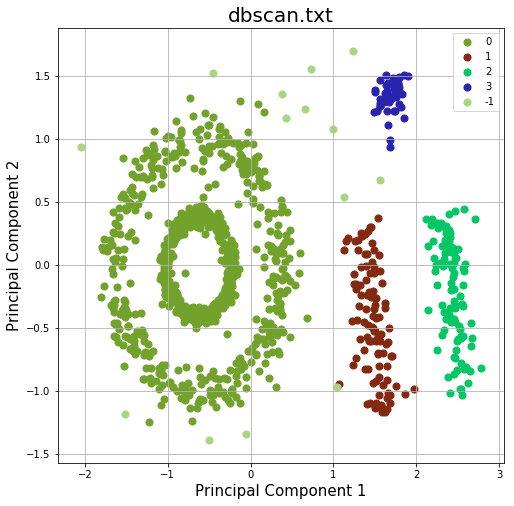

In [264]:
# # LIBRARY IMPLEMENTATION On IYER.TXT

clusters_dbscan1 = DBSCAN(epsilon_dbscan, minimumpoints_dbscan).fit(dbscan1)#dbscan using library implementation
unique_clusters_dbscan1=Unique_Clusters(clusters_dbscan1.labels_)#unique clusters using libraray implementation
unique_clusters_dbscan1
clusters_dbscan1.labels_=clusters_dbscan1.labels_.reshape((len(dbscan1),1))
PCA_Plot(clusters_dbscan1.labels_,dbscan1,unique_clusters_dbscan1,"dbscan.txt")#pca plot for library implementation

# Scratch Implementation DBSCAN.TXT

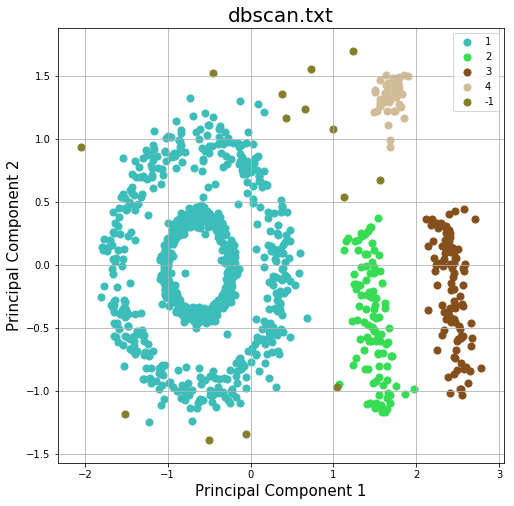

In [265]:
#DBSCAN
clusters_dbscan = My_DBSCAN(dbscan1, epsilon_dbscan, minimumpoints_dbscan)#dbscan using our implementation
unique_clusters_dbscan=Unique_Clusters(clusters_dbscan)#unique clusters using our implementation
unique_clusters_dbscan
clusters_dbscan=listToList(clusters_dbscan)
PCA_Plot(clusters_dbscan,dbscan1,unique_clusters_dbscan,"dbscan.txt")#pca plot for our implementation


In [266]:
# # jaccard and rand coefficients for iyer.txt

JaccardRand(iyer[:,1],clusters_iyer,"iyer.txt")#jaccard and rand coefficient for our method
JaccardRand(iyer[:,1],clusters_iyer1.labels_,"iyer.txt")#jaccard and rand coefficient for library method
plt.show()

The RAND coefficient for iyer.txt is:0.650737591147
The JACCARD coefficient for iyer.txt is:0.283738059616
The RAND coefficient for iyer.txt is:0.650737591147
The JACCARD coefficient for iyer.txt is:0.283738059616
